## Dataset Link
https://infyspringboard.eu.onwingspan.com/common-content-store/Shared/Shared/Public/lex_auth_0126051846164643841294_shared/web-hosted/assets/AirPassengers1612202105441.zip

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

AirPassengersdf = pd.read_csv("AirPassengers.csv",parse_dates = [0])

AirPassengersdf.describe().T

,count,mean,min,25%,50%,75%,max,std
Travel date,144,1954-12-16 05:00:00,1949-01-01 00:00:00,1951-12-24 06:00:00,1954-12-16 12:00:00,1957-12-08 18:00:00,1960-12-01 00:00:00,NaN
Passengers,144.0,280.298611,104.0,180.0,265.5,360.5,622.0,119.966317


<Axes: >

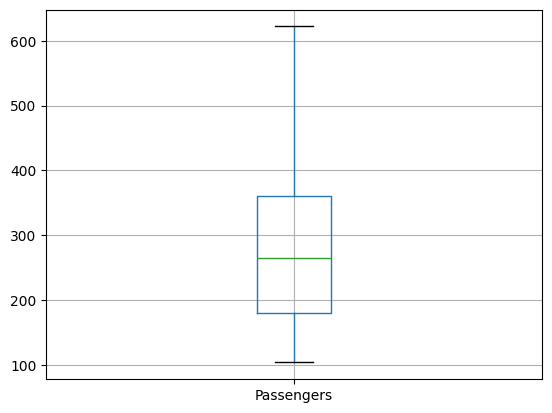

In [4]:
AirPassengersdf.boxplot()

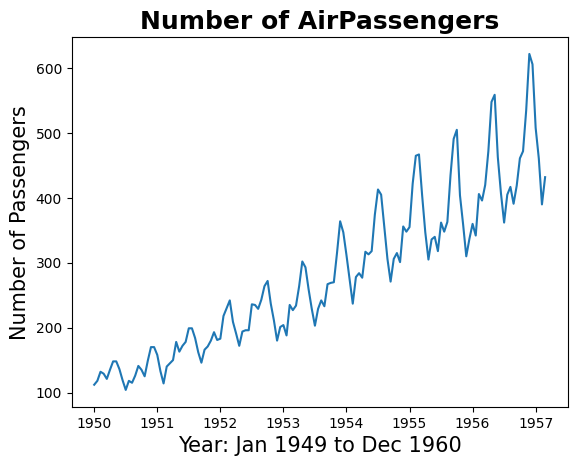

In [5]:
# Getting the years
year = AirPassengersdf['Travel date'].dt.year

#Visualizing the time series by plotting number of passengers versus time

fig, ax = plt.subplots()
ax.plot(AirPassengersdf.Passengers)
ax.set_title('Number of AirPassengers', weight='bold',fontsize=18)
ax.set_ylabel('Number of Passengers', fontsize=15)
ax.set_xlabel('Year: Jan 1949 to Dec 1960', fontsize=15)
ax.set_xticklabels(np.unique(year))
fig.show()


### Dataset Link
https://infyspringboard.eu.onwingspan.com/common-content-store/Shared/Shared/Public/lex_auth_0126051846164643841294_shared/web-hosted/assets/Cars931612202333548.zip

In [6]:
cars93 = pd.read_csv('Cars93.csv')
cars93.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,NaN,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


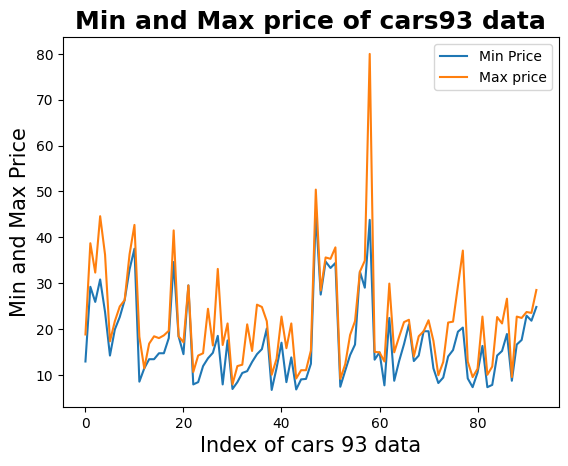

In [7]:
plt.plot(cars93['Min.Price'],label='Min Price')
plt.plot(cars93['Max.Price'],label='Max price')
plt.legend()
plt.xlabel('Index of cars 93 data', fontsize=15)
plt.ylabel('Min and Max Price',fontsize=15)
plt.title('Min and Max price of cars93 data', weight='bold', fontsize=18)
plt.show()

As the two datasets are of different types, the prediction techniques used for Cars93 cannot be used for AirPassengers and vice versa.

AirPassengers contains the number of passengers taking the international flight between January 1949 to December 1960. The data has been collected over a period of time. Therefore, only one attribute is present(No. of passengers), which is being observed at regular time intervals. This type of data is known as **Time Series Data.**

On the other hand, Cars93 has 27 parameters that are assumed to be observed at the same time, since the time component is missing. This type of data is known as **Identically and Independently Distributed data(IID).**

Travel date    datetime64[ns]
Passengers              int64
dtype: object

#### Wroking with datetime object

In [10]:
Airlinedf = pd.read_csv('AirPassengers.csv')
Airlinedf.dtypes

Travel date    object
Passengers      int64
dtype: object

In [11]:
Airlinedf['Travel date'] = pd.to_datetime(Airlinedf['Travel date'])
Airlinedf.dtypes

Travel date    datetime64[ns]
Passengers              int64
dtype: object

In [12]:
Airlinedf.index = Airlinedf['Travel date']
Airlinedf.drop(['Travel date'],axis=1,inplace=True)

Airlinedf.resample('M').mean().head()

,Passengers
Travel date,
1949-01-31,112.0
1949-02-28,118.0
1949-03-31,132.0
1949-04-30,129.0
1949-05-31,121.0


#### Creating a date time range with a particular frequency:

In [14]:
import numpy as np

np.random.seed(42)
val = np.arange(500)
np.random.shuffle(val)
val = val[:10]
val

array([361,  73, 374, 155, 104, 394, 377, 124,  68, 450])

In [15]:
import pandas as pd
dummy_ = pd.DataFrame(val,index=pd.date_range(start='1/1/1910',end='1/10/1910',freq='D'),columns=['RandomData'])
dummy_

,RandomData
1910-01-01,361
1910-01-02,73
1910-01-03,374
1910-01-04,155
1910-01-05,104
1910-01-06,394
1910-01-07,377
1910-01-08,124
1910-01-09,68
1910-01-10,450


#### Converting an unsorted date into a sorted date:  

In [31]:
np.random.seed(42)

date_range = pd.date_range(start='1/1/1910',end='1/10/1910',freq='D')

index = np.arange(10)
np.random.shuffle(index)
unordered_data = pd.DataFrame(val,index=date_range[index])

In [32]:
unordered_data.sort_index(inplace=True)
unordered_data.head()

,0
1910-01-01,155
1910-01-02,73
1910-01-03,394
1910-01-04,68
1910-01-05,124


## Time Series Analysis - Exercise

### Problem Statement:
Create a time series data on a monthly basis starting from April 2007 to March 2012 considering random numbers as values with seed value as 42.

 

In [33]:
date_range = pd.date_range(start='1/4/2007',end='31/03/2012',freq='M')

In [35]:
date_range.shape

(63,)

In [39]:
np.random.seed(42)
val = np.arange(63)
np.random.shuffle(val)
val

df = pd.DataFrame(val,index=date_range)

In [42]:
df.resample('M').mean().head()

,0
2007-01-31,61.0
2007-02-28,57.0
2007-03-31,0.0
2007-04-30,43.0
2007-05-31,5.0


In [43]:
df.resample('Y').mean()

,0
2007-12-31,31.583333
2008-12-31,25.083333
2009-12-31,36.416667
2010-12-31,31.250000
2011-12-31,28.666667
2012-12-31,39.000000


## Paterns in time series data

Analyzing the past data can be done by keeping in mind the following factors: 

**Trend:** shows a long term increase or decrease in data

**Seasonal:** when the data is affected by seasonal factors

**Cyclic:** data shows fluctuations across any period of time

**Random:** If the above 3 components are missing in a data

The time series data may be a combination of one or more of these factors.

In [18]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
AirPassengersdf.head()

AirPassengersdf.set_index('Travel date',inplace=True)


In [14]:
AirPassengersdf.head()

,Passengers
Travel date,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


### Trend

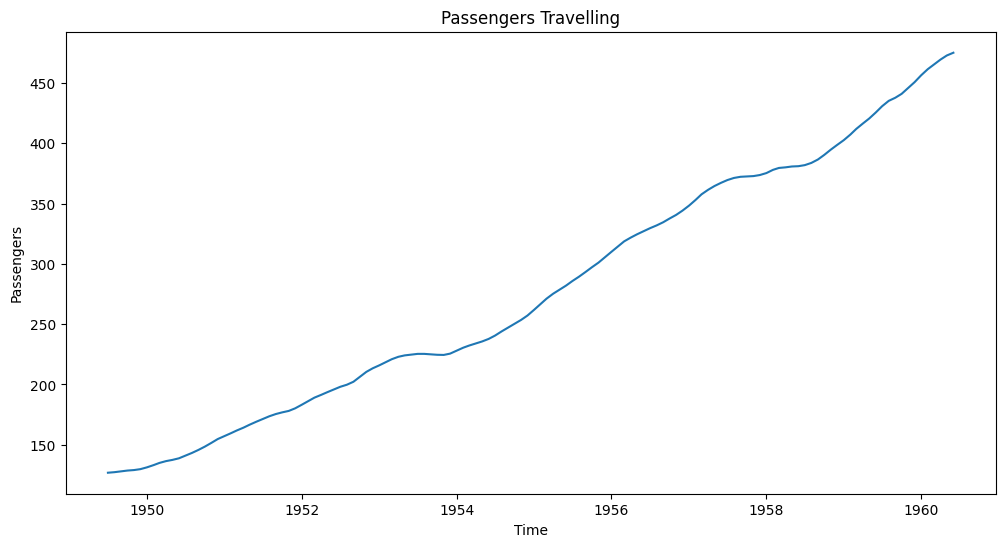

In [19]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(seasonal_decompose(AirPassengersdf).trend)
ax.set_xlabel('Time')
ax.set_ylabel('Passengers')
ax.set_title('Passengers Travelling')
plt.show()

### Seasonal

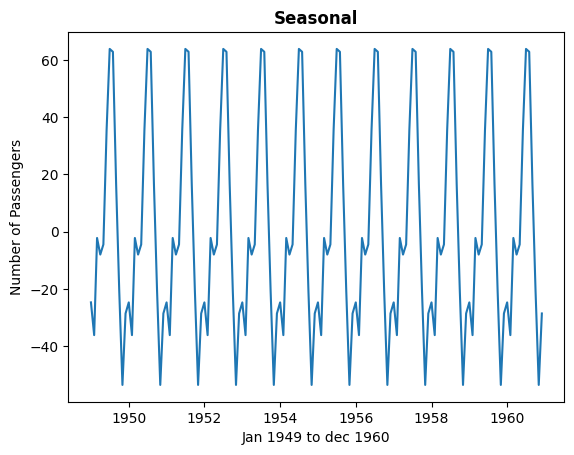

In [68]:
plt.plot(seasonal_decompose(AirPassengersdf).seasonal)
plt.xlabel('Jan 1949 to dec 1960')
plt.ylabel('Number of Passengers')
plt.title('Seasonal',weight='bold')
plt.show()



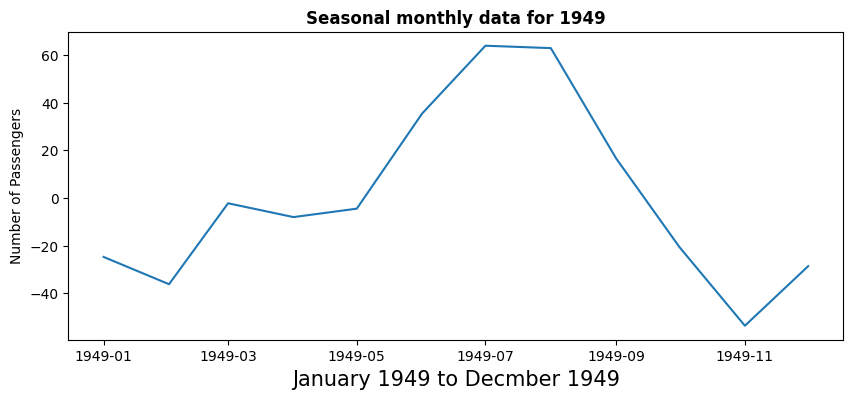

In [78]:
figure,ax = plt.subplots(figsize=(10,4))
ax.plot(seasonal_decompose(AirPassengersdf).seasonal.head(12))
ax.set_xlabel('January 1949 to Decmber 1949', fontsize=15)
ax.set_ylabel('Number of Passengers')
ax.set_title('Seasonal monthly data for 1949',weight='bold')
plt.show()

### Dataset Link
https://infyspringboard.eu.onwingspan.com/common-content-store/Shared/Shared/Public/lex_auth_0126051850322984961303_shared/web-hosted/assets/Googlestock1612785067248.zip

,Date,Open,High,Low,Close,Volume,Name
0,7/7/2006,213.24,214.16,208.15,210.44,6042310,GOOGL
1,7/10/2006,211.93,212.83,208.40,209.31,4438867,GOOGL
2,7/11/2006,209.46,212.74,206.72,212.49,5972817,GOOGL
3,7/12/2006,211.26,211.58,208.57,208.83,4906618,GOOGL
4,7/13/2006,207.21,209.38,203.62,204.62,6924475,GOOGL


In [54]:

google_df = pd.read_csv('Google_stock.csv',parse_dates=['Date'],date_format='%m/%d/%Y',index_col='Date')
google_df.head()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2006-07-07,213.24,214.16,208.15,210.44,6042310,GOOGL
2006-07-10,211.93,212.83,208.40,209.31,4438867,GOOGL
2006-07-11,209.46,212.74,206.72,212.49,5972817,GOOGL
2006-07-12,211.26,211.58,208.57,208.83,4906618,GOOGL
2006-07-13,207.21,209.38,203.62,204.62,6924475,GOOGL


### Trend

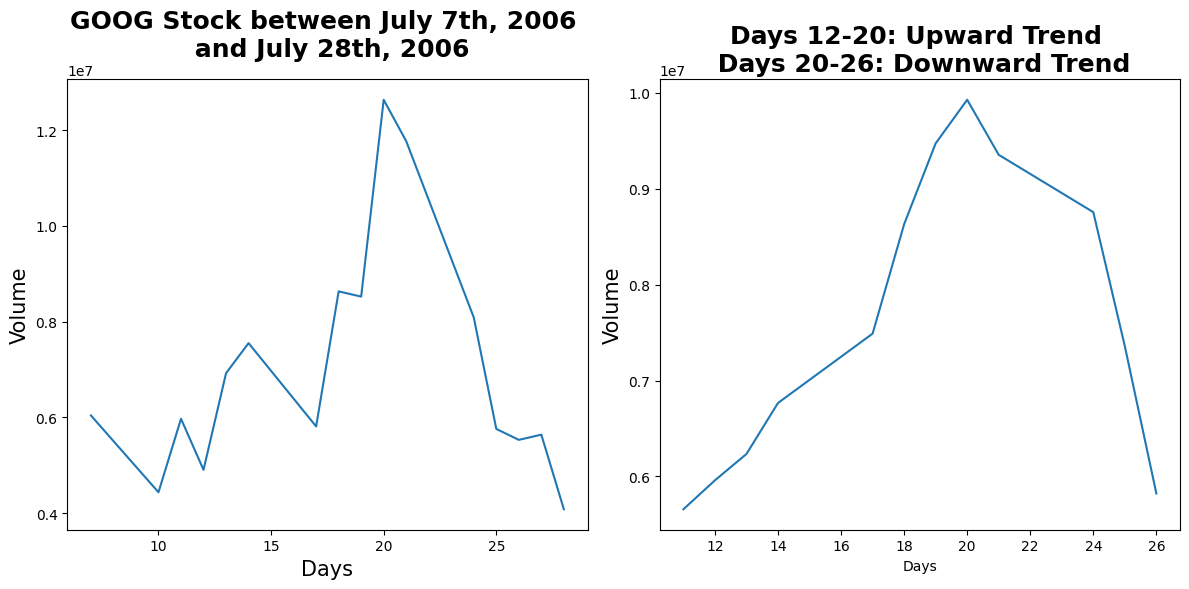

In [60]:
plt.figure(figsize=(12,6))
ax1 = plt.subplot2grid((1,2),(0,0))
ax1.plot(google_df.index.day,google_df.Volume)
ax1.set_xlabel('Days',fontsize=15)
ax1.set_ylabel('Volume',fontsize=15)
ax1.set_title('GOOG Stock between July 7th, 2006 \n and July 28th, 2006', weight='bold', fontsize=18)

ax2 = plt.subplot2grid((1,2),(0,1))
ax2.plot(google_df.index.day,seasonal_decompose(google_df.Volume).trend)
ax2.set_xlabel('Days')
ax2.set_ylabel('Volume',fontsize=15)
ax2.set_title('Days 12-20: Upward Trend \n Days 20-26: Downward Trend', weight='bold', fontsize=18)
plt.tight_layout()

### Cycle

## Dataset link:
https://infyspringboard.eu.onwingspan.com/common-content-store/Shared/Shared/Public/lex_auth_0126051850322984961303_shared/web-hosted/assets/hsales1612247147997.zip

In [81]:
hsales_df = pd.read_csv('hsales.csv',parse_dates=['date'],date_format='%m/%d/%Y',index_col='date')
hsales_df.head()

,hsales
date,
1973-01-01,55
1973-02-01,60
1973-03-01,68
1973-04-01,63
1973-05-01,65


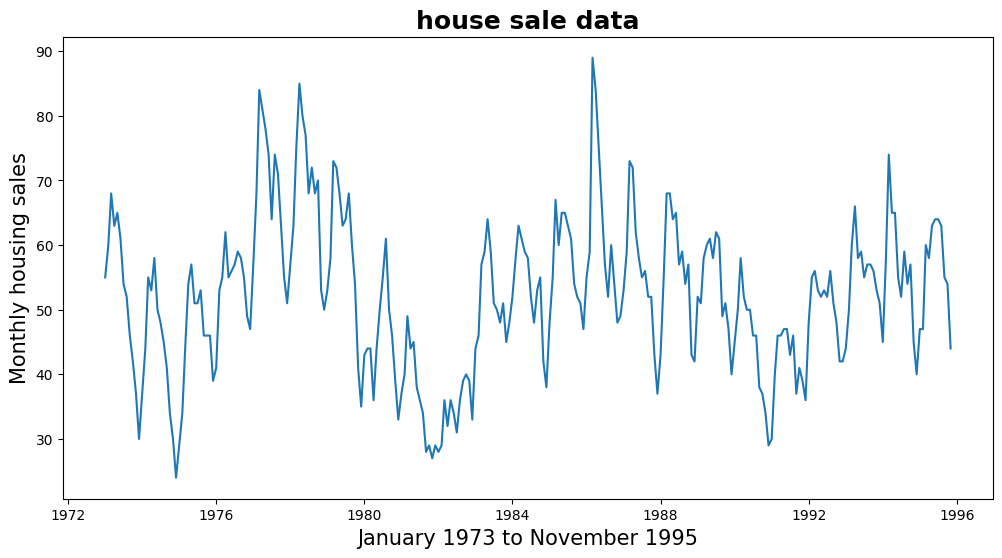

In [85]:
fig,ax = plt.subplots(figsize=(12,6))
ax.plot(hsales_df)
ax.set_xlabel('January 1973 to November 1995',fontsize=15)
ax.set_ylabel('Monthly housing sales',fontsize=15)
ax.set_title('house sale data',weight='bold',fontsize=18)
plt.show()

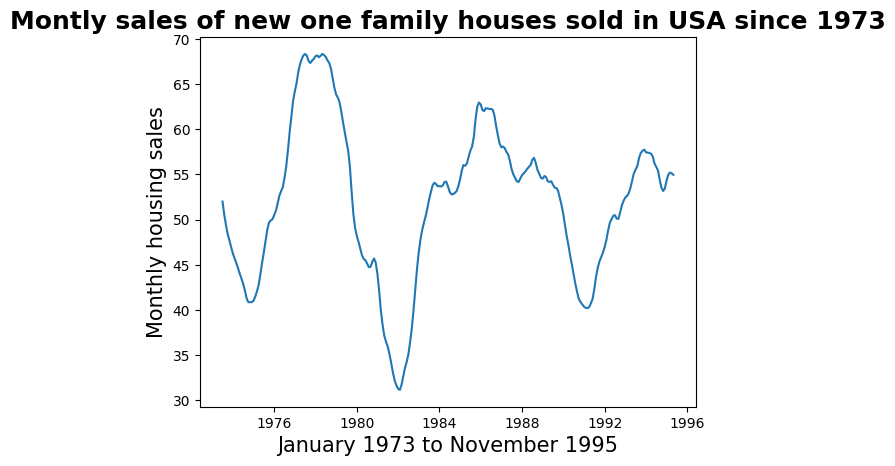

In [87]:
plt.plot(seasonal_decompose(hsales_df).trend)
plt.xlabel('January 1973 to November 1995',fontsize=15)
plt.ylabel('Monthly housing sales',fontsize=15)
plt.title('Montly sales of new one family houses sold in USA since 1973',weight='bold',fontsize=18)
plt.show()

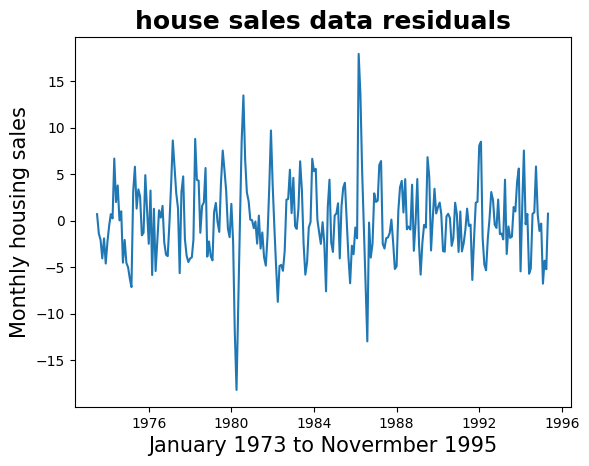

In [89]:

# Visualizing residuals of house sales data
plt.plot(seasonal_decompose(hsales_df).resid)
plt.xlabel('January 1973 to Novermber 1995', fontsize=15)
plt.ylabel('Monthly housing sales', fontsize=15)
plt.title('house sales data residuals', weight='bold', fontsize=18)
plt.show()


# Patterns in time series - Exercise
Plot the trend, seasonality, and residuals of the number of appliances present against the date feature for the Appliance dataset.

### Dataset Link
https://infyspringboard.eu.onwingspan.com/common-content-store/Shared/Shared/Public/lex_auth_012717716855816192252_shared/web-hosted/assets/Appliance1612768250128.zip

In [96]:
appliance_df = pd.read_csv('Appliance.csv',parse_dates=['date'],date_format='%m/%d/%Y %H:%M',index_col='date')

In [97]:
appliance_df.head()


,Appliances
date,
2016-01-11 17:00:00,60
2016-01-11 17:10:00,60
2016-01-11 17:20:00,50
2016-01-11 17:30:00,50
2016-01-11 17:40:00,60


In [107]:
appliance_df.tail()

,Appliances
date,
2016-05-27 17:20:00,100
2016-05-27 17:30:00,90
2016-05-27 17:40:00,270
2016-05-27 17:50:00,420
2016-05-27 18:00:00,430


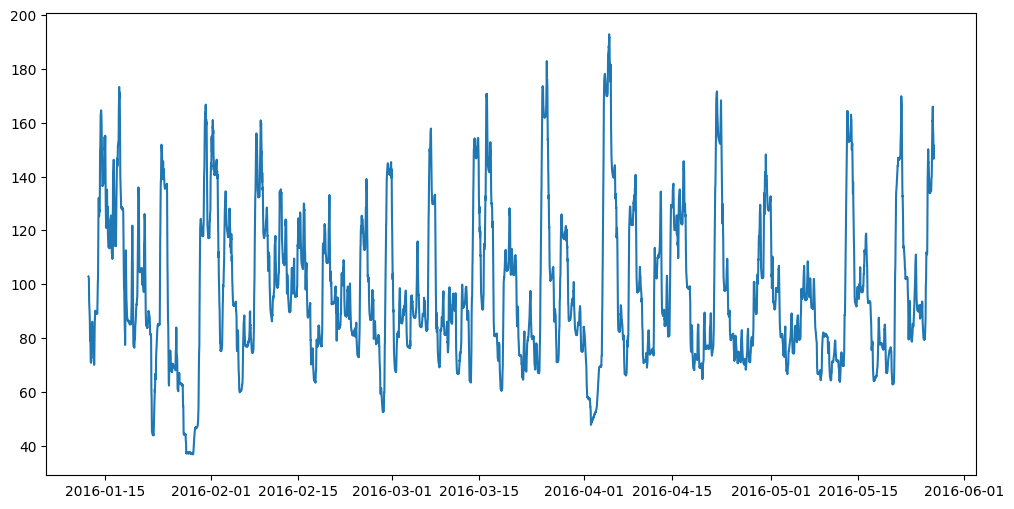

In [129]:
fig, ax = plt.subplots(figsize=(12,6))
ax.plot(seasonal_decompose(appliance_df['Appliances'],period=24*7).trend)
fig.show()